# Sediment Size Analysis by Sieve (SedSAS) Class 

## Part I: Introduction:

SedSAS is a class object written in the Python programming (scripting) language. Its purpose is to provide a set of basic software-based statistical and visualization tools for analyzing unconsolidated sediment size-fraction samples collected in the field and separated using either mechanical sieves or similar analog partition-by-size methods. 

The script is a stand-alone ASCII-compliant text file with UNIX record delimiters (\n). It can be called via user-built Python scripts (using this guide to get the user started), or through environments such as this one (Jupyter notebooks). In addition to this notebook, a small collection of sample scripts are supplied in this repository to make both learning and using the SedSAS class as simple and unobtrusive as possible. 

You can use this notebook not only as a learning tool but also as a template from which to directly conduct your own analyses. The notebook can be modified, or copied and then the copy modified, as you see fit. 

### What can the SedSAS class do:

**From a sample file of fractional ($\phi$) weights compiled from sediment partitioned by size (via mechanical sieving or similar), the methods in the SedSAS Class can do the following:**
- compute weight percentages and cumulative weight percentages for each $\phi$ fraction relative to the total sample
- derive and compute the mean, median, and sorting (standard deviation) in $\phi$ units using the graphic method described by Folk (1980)
- compute the mean and sorting (standard deviation) in $\phi$ units using the method of moments (MoM) as described by Folk (1980)
- derive the distribution's modes in $\phi$ and weight percentage units
- generate a histogram (bins=#sieves) with frequency curve and cumulative frequency curve for sample weight percentages and cumulative weight percentages

- compute weight and cumulative weight percentages, graphic and MoM statistics and modes, and write these results either to standard out or to a comma-separated text file

#### The graphical statistics computational formulae used by the SedSAS Class (per Folk, 1980):

$$ mean={ \phi_{16} + \phi_{50}+\phi_{84} \over 3 } $$
<br>
$$ median=\phi_{50} $$
<br>
$$ sorting = {\phi_{16} + \phi_{84} \over 4} + {\phi_{95} - \phi_{5} \over 6.6 } $$
<br>
$$ skewness = {\phi_{16} + \phi_{84} - 2\phi_{50} \over 2(\phi_{84} - \phi_{16}) } + {\phi_{5} + \phi_{95} - 2\phi_{50} \over 2(\phi_{95} - \phi_{5}) } $$
<br>
$$ kurtosis = {\phi_{95} - \phi_{5} \over 2.44(\phi_{75} - \phi_{25}) } $$ 

#### The method of moment computational statistics formulae used by SedSAS Class (per Folk, 1980):

$$ \phi \enspace arithmetic \enspace mean \enspace (M_{\phi}) = {\sum{DW} \over \sum{W} }  $$
<br><br>
$$ standard \enspace deviation \enspace (\sigma_{\phi}) = \sqrt{\sum{[W(M_{\phi}-D)^2] } \over \sum{W}} $$
<br>
<br>
**where:**<br>
- D = sieve size fraction (bin) mid-point <br>
- W = sieve size fraction weight (in grams) <br>
- M$\phi$ = the computed method of moments mean

**Reference:** 'Folk, R. 1980. Petrology of Sedimentary Rocks. Hemphill Publishing Company, Austin, TX. 184p.

## Part II Using the SedSAS Class

### Guide to understanding and using the SedSAS Class:<a name="Guide"></a>

This is a basic but hopefully sufficient guide to setting up and using the SedSASClass for analyzing sediment sample data. Click on the links for more information and example(s)

- #### Preliminaries:
    - Required Python (Part I): The SedSASClass, this notebook, and all supporting materials were developed in a Python 3.x environment. Neither the class nor any of these supporting materials have been tested using a Python 2.x distro. *Backward compatibility is expected, but not assured.*
    
    - Required Python (Part II): If you do not have Python (version 3.), your best bet for a trouble-free install experience can be had here: Continuum Analytics: https://www.continuum.io Anaconda. If you're more adventurous, try the Python Software Foundation: https://www.python.org/getit/. 
    
    - [Required external Python Libraries and modules](#Required Libraries) List of required installed Python libraries (e.g., numpy, scipy, pandas) needed by the SedSASClass
    
    - [User inputs](#User Inputs) Information to be provided by the user, needed to initiate and use the class
    
    - [Structuring Input Data](#Structuring) This very important step prepares the raw sediment weights data for loading into the pandas data frame that will passed to SedSAS class at instantiation. 

    - [Reading the source data into the pandas data frame](#Readingthesource): Loading the source data
    
    - [Creating a SedSAS class instance](#instantiatingclass): creating an instance of the SedSAS class. You must create this instance before you can call any of the methods that follow.
    
- #### User-callable Class Methods:
    - Computational Methods:
        - [InterpolateQuantileValues](#InterpolateQuantileValues): computes the sample data values for the  quantiles (per Folk, 1980)
<br>    
        - [ComputeGraphicStats](#graphic stats): compute graphical statistics (mean, median, standard deviation, skewness, and kurtosis) for the sample data as described by Folk, 1980 and others.
<br>    
        - [ComputeMomentStats](#moment stats): computes the mean and standard deviation for the sample data using the method of moment formulae provided by Folk, 1980.
<br>    
        - [FindSampleModes](#sample modes): locates and reports [up to] the first three sample mode values seen in the sample data
    <br><br>
    - Plotting and Console Reporting Methods:
        - [PrintSampleWeightsDataTable](#print weight data table): prints the sample weights, percent sampled weights, cumulative weights, and sample quantile values to standard out.
<br>    
        - [PrintGraphicStats](#print graphic stats): prints the graphical statistics generated by method ComputeGraphicStats formatted to standard out (console)
<br>    
        - [PrintMomentStats](#print moment stats): prints the method of moment based statistics generated by method ComputeMomentStats formatted to standard out (console)
<br>    
        - [PrintSampleModes](#print sample modes): prints the modal values detected in the data by method FindSampleModes formatted to standard out (console)
<br>    
        - [PLOTSampleWtPercents](#plot sample weight percents): generates a histogram of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df
<br>    
        - [PLOTSampleCumWtPercents](#plot cum weight percents): generates a cumulative frequency curve (line) of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df
<br>    
        - [PLOTDualSampleWtPercents](#plot dual sample weights): generates both a histogram and a cumulative frequency curve (line) of weight percentage values for given sample as generated in the class constructor (__init__) and stored in the dataframe df. This is a convenience method that combines the work of PLOTSampleWtPercents and PLOTSampleCumWtPercents into a single function call.
<br><br>
    - General Methods:
        - [GetDataFrame](#get data frame): returns a copy to the pandas data frame df that is built in the SedSASampleClass constructor during initialization and is used throughout the class methods for subsequent computations and reporting. This method will likely prove to be useful when calling SedSASampleClass methods directly (rather than doing streamlined processing-see below).
<br><br>
    - Streamlined Processing Methods:
        - [Analyze2CSV](#analyze2csv): a convenience function that calls ComputeGraphicStats, ComputeMomentStats, and FindSampleModes and writes the results, along with the individual weight percentages, to a comma separated text values file. The user provides a filename when calling this method.
   <br>
        - [Analyze2Stdout](#analyze2stdout): another convenience function that performs much the same work as Analyze2CSV but instead of writing to a file, outputs results all to standard out.

## Part III: Using the class:

#### a.) Required libraries and modules:<a name="Required Libraries"></a>

The SedSASClass will call and attempt to load into the class namespace the following Python libraries:

- sys
- pandas
- numpy
- matplotlib.pyplot

These should be installed in your Python environment prior to working with the SedSASClass. Note that the class itself will call these at instantiation.

If your script is in a directory other than the same one where the SedSASClass file itself is stored you will have to amend the system's path variable (only for this namespace and only while the current namespace exists). You can do this with the sys.path.append command:

        import sys
        sys.path.append(' </path/to/class/location/> ')
        
[Back to Guide](#Guide)

#### b.) Required User Inputs: <a name="User Inputs"></a>

Here's what you need to provide up front in order to make use of the class

    - full (absolute) path to the sediment sample weights data file
    - name of the sediment sample weights data file (w/extension). This is the file that contains all of your sieved sample weights.
    - Python list of transect ids
    - Python list of sample ids per transect
    - Python list of sieve [screen] sizes used in the analysis
    
<br>
Here's an example (# indicates a comment; Python code is italicized):

\# ###### USER INPUTS Example ##########################################################
\# <br>
1.) Enter the absolute (full) path to the file(s) containing the data to be analyzed: <br>
*fp='./'*

\# 2.) Enter the name of the file(s) containing the data to be analyzed: <br>
*fn='USFWS_t2.txt'*

\# 3.) Set the field delimiter used to separate data columns (fields) in the input file fn: <br>
*delim=','*

\# 4.) Enter the transect name(s)/id(s) as a Python list: <br>
*trList=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16']* 

\# 5.) Set up the samples list. Modify the existing list as needed: <br>
*samples=['S1','S2','S3','S4']*

\# 6.) Set up the screens list. Modify the existing list as needed to reflect the sieves 
\# used. Values represent phi screen units: <br>
*scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]*

[Back to Guide](#Guide)

 #### c.) Structuring the input data <a name="Structuring"></a>
 
 Perhaps the most difficult aspect of working with this notebook and the SedSASClass is getting your data into a form that can be passed into the class init method (the constructor) during class instantiation. The reason behind the possible difficulty is that the data, which you will submit to the class constructor as a Pandas data frame, needs only select information, probably much less than you captured as part of your lab analyses. Here's what you'll need to supply for each sample record that will be loaded into the data frame df:

    - the transect id
    - the sample number
    - the individual sieved sediment weights (grams are assumed for report labeling, but the actual weight units of the data have no bearing on the computations carried out in SedSASampleClass. A typical text file might be formatted like this:

    TRANSECT, SAMPLE, Phi_01, Phi_05, Phi_00,...,Phi_5

from here, you can use a Pandas method such as read_csv or read_table to load your raw data into a data frame. Optionally, you can read your raw data from a Microsoft Excel spreadsheet using the Pandas read_xls method. Examples are provided elsewhere in this notebook.

[Back to Guide](#Guide)

#### c.) Reading the source data into a pandas data frame: <a name="Readingthesource"></a>

In order to be able to create an instance of the SedSAS class you first must load your source data into a pandas data frame. Fortunately, this is a simple, often single-line, process. Once the source data is loaded,you must re-work the data in the data frame so that only the following columns remain:

- Transect id, Sample id, individual sieved fraction weights for each sample from coarsest to finest--one screen weight per column. 

Example  (# indicates a comment; Python code is italicized):

*import pandas as pd*

\# reads the csv file located at: /fp/fn into a new pandas data frame named df <br>
*df = ps.read_csv(fp+fn)* 

[Back to Guide](#Guide)

#### e.) Creating an instance of the SedSAS Class: <a name="instantiatingclass"></a>

When you instantiate the SedSASampleClass in your project you will send a copy of the Pandas dataframe that you create from your raw data, along with the currently processed transect, samples list, and scrns list to the constructor (__init__) method. The calls to load and instantiate the class looks like this (Python code is italicized):

*import SedSASClass as sc* <br>
*s = sc.SedSASample(df, transect, samples, scrns)*


[Back to Guide](#Guide)

### Class Method Definitions/Descriptions:

#### InterpolateQuantileValues <a name="InterpolateQuantileValues"></a> 

interpolate quantiles in self.quantilesList for each transect sample. Calls internal function  ReturnQuantile() for each quantile value to be computed from the seived weights.  

quantilesList=list of quantiles that will be interpolated to compute statistics.
These are fixed, based on requirements from Folk, (1980).
		
        self.quantilesList=[5,10,16,25,50,75,84,90,95] 

Input args: none

Returns: an ordered Python dictionary (key=sample identifier; value=interpolated quantile list). Quantiles returned in phi units.
               
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method InterpolateQuantileValues for a single transect:

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        print('Quantiles for Sample:', key, '=', val)


In [ ]:
### EXAMPLE: calling method InterpolateQuantileValues for a multiple transects:

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2_t16.csv'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)


trList=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16']    
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    if(sc.foundTransect==True):
        D=sc.InterpolateQuantileValues()
    
        for key, val in D.items():
            print('Quantiles for Sample:', key, '=', val)

#### ComputeGraphicStats <a name="graphic stats"></a> 

computes "graphic" mean, median, standard deviation, skewness, and kurtosis (per Folk, 1980) for a given transect sample.
<br>
Input args:<br>
	- s  sample identifier as a Python string (EX. 'S1')
	- Q  list of interpolated quantile values (9 items) for current sample <br>
    Note that s are the keys and Q  the values in the ordered dictionary returned by method InterpolateQuantileValues
<br>
Returns: Python tuple containing MN=mean, MD=median, SD=std. dev., SK=skewness, K=kurtosis in phi units.
<br>      
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method ComputeGraphicStats (for single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        gs=sc.ComputeGraphicStats(key, val)
        print('Mean=', gs[0],'Median=',gs[1],'Stdev=',gs[2],'Skew=',gs[3],'Kurt=',gs[4])

#### ComputeMomentStats <a name="moment stats"></a> 

computes the sediment sample mean and standard deviation using the arithmetic method of moments method as described by Folk (1980) for current sample.

Input args:
	s = sample identifier as a Python string (EX. 'S1')

Returns:
	Python tuple containing momMean=mean, momSD=standard deviation,
	undifCF=undifferentiated coarse fraction (the weight of material
	captured by the coarsest sieve), undifFF=undifferentiated fine 
	fraction (the weight of material captured by the residual pan at 
	the bottom of the seive stack).
                         
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method ComputeMomentStats (for single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        mms=sc.ComputeMomentStats(key)
        print('For',key, 'Mean=', mms[0],'Stdev=',mms[1],'undif. coarse fract (gms):',mms[2],'undif. fine fract (gms):', mms[3])

#### FindSampleModes <a name="sample modes"></a> 

locates any, up to the first three, modal weight percentage values in current sample. 

Input args: 
	s = sample identifier as a Python string (EX. 'S1)

Returns: Python ordered dictionary of modes (if any) found in the current 
		 sample. The dictionary key contains the mode in phi size units. 
		 The dictionary values are the modes in weight percentages.
                    
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method FindSampleModes (for single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        md=sc.FindSampleModes(key)
        print('For',key,'up to the first 3 modes resolved (phi and gms):',md)

#### PrintSampleWeightsDataTable <a name="print weight data table"></a> 

prints the raw, weight percentage, and cumulative weight percentage values in tabular format for each screen bin to standard output (terminal or console window).

Input args: 
	s = sample identifier as a Python string (EX. 'S1)

    Returns: none
            
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method PrintSampleWeightsDataTable (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        md=sc.PrintSampleWeightsDataTable(key)

#### PrintGraphicStats <a name="print graphic stats"></a> 

prints the graphic mean, median, standard deviation, skewness, and kurtosis for each transect sample in tabular format to the console. 

Input args:
	s = sample identifier as a Python string (EX. 'S1)<br>
	gStats = Python tuple containing the graphic mean, median, std. dev.skewness and kurtosis.

Returns: none

Note: the gStats tuple is generated by method self.ComputeGraphicStats()
             
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method PrintGraphicStats (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        gs=sc.ComputeGraphicStats(key, val)
        sc.PrintGraphicStats(key, gs)

#### PrintMomentStats <a name="print moment stats"></a> 

prints the method of moments computed sediment size mean and standard deviation and undifferentiated coarse and fine fractions for the sample in tabular format to the console.

Input args: 
    mStats = Python tuple containing method of moments mean, std. dev., 
			 undiff. coarse fraction weight, undiff fine fraction weight.

Returns: none

Note: the mStats tuple is generated by method self.ComputeMomentStats()
            
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: calling method PrintMomentStats (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        mms=sc.ComputeMomentStats(key)
        sc.PrintMomentStats(mms)

#### PrntSampleModes <a name="print sample modes"></a> 

		'''Prints the mode values located in method FindSampleModes to the console

		   Input args:
			   modes = Python dictionary containing key (mode in phi units) and value
					   (mode in weight percent) pairs

		   Returns: none
		
[Back to Guide](#Guide)

In [ ]:
### Example: calling method PrintSampleModes (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        md=sc.FindSampleModes(key)
        sc.PrintSampleModes(md)

#### PLOTSampleWtPercents <a name="plot sample weight percents"></a> 

plots the individual sample weight percentages, by sieve fraction as a histogram and overprinted frequency (PDF) curve for the current sample. Can plot to console or to stored PNG file.

Input args:
    s = sample identifier as a Python string (EX. 'S1)<br>
    mode = plot destination: mode='print' plot written to console (default) ;
     mode='save' plot written to png output
     
Returns: none
                                               
[Back to Guide](#Guide)


Processing transect: T2


--------------------------------------------------------------------------------


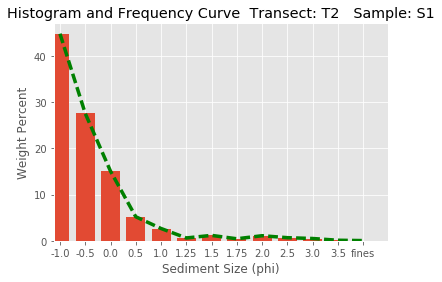

--------------------------------------------------------------------------------


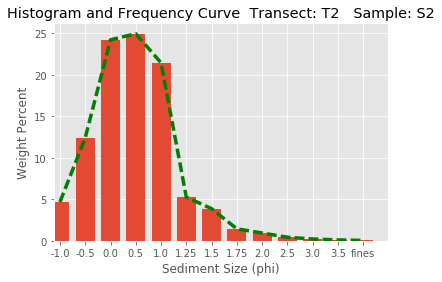

--------------------------------------------------------------------------------


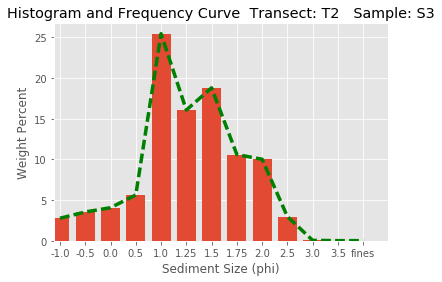

--------------------------------------------------------------------------------


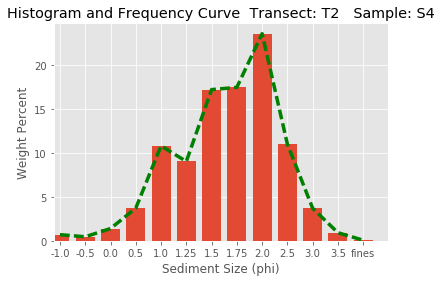

In [1]:
### EXAMPLE: Calling method PLOTSampleWtPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTSampleWtPercents(key)   # mode defaults to 'plot to console'

#### PLOTSampleCumWtPercents <a name="plot cum weight percents"></a> 

plots the individual sample cumulative weight percentages, by sieve fraction as a cumulative frequency (CDF) curve for the current transect sample. Can plot to console or to stored PNG file.

Input args:
    s = sample identifier as a Python string (EX. 'S1)<br>
    mode = plot destination: mode='print' plot written to console (default) ;
    mode='save' plot written to png output
											   
Returns: none
            
[Back to Guide](#Guide)


Processing transect: T2


--------------------------------------------------------------------------------


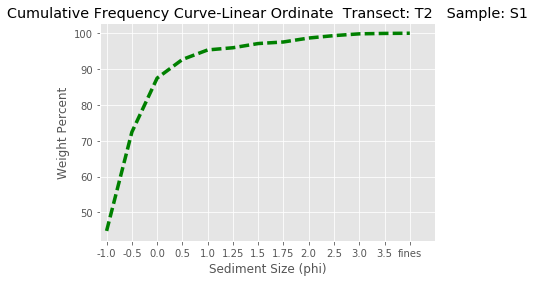

--------------------------------------------------------------------------------


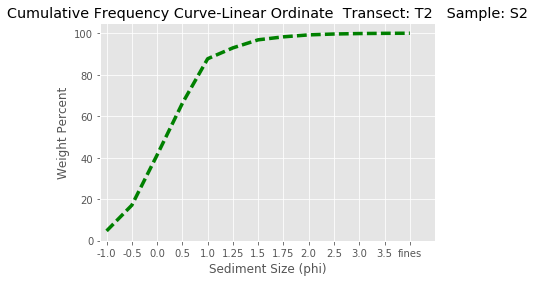

--------------------------------------------------------------------------------


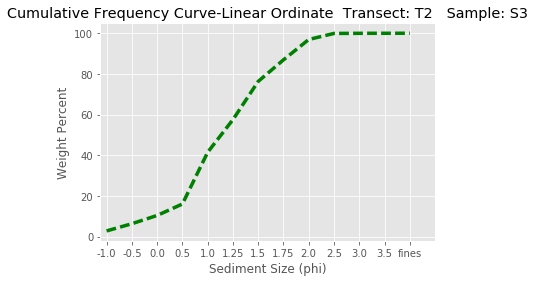

--------------------------------------------------------------------------------


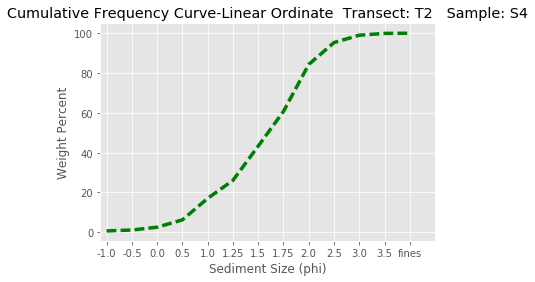

In [2]:
### EXAMPLE: Calling method PLOTSampleCumWtPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTSampleCumWtPercents(key)   # mode defaults to 'plot to console'

#### PLOTDualSampleWtPercents <a name="plot dual sample weights"></a> 

plots both the weight percentage and cumulative weight percentage histogram and curves (histo+PDF, and CDF) side by side and together, by sieve fraction for the current transect sample. Can plot to console or to stored PNG file.

Input args:
    s = sample identifier as a Python string (EX. 'S1)<br>
    mode = plot destination: mode='print' plot written to console (default) ;
    mode='save' plot written to png output
											   
Returns: none

Note: This is just a convenient combination of methods PLOTSampleWtPercents and PLOTSampleCumWtPercents.
                
[Back to Guide](#Guide)


Processing transect: T2





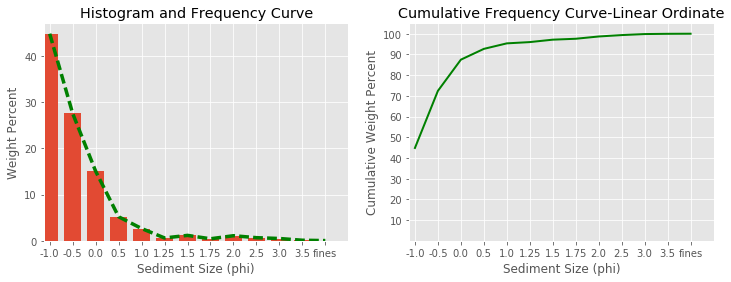

------------------------------------------------------------------------------------------



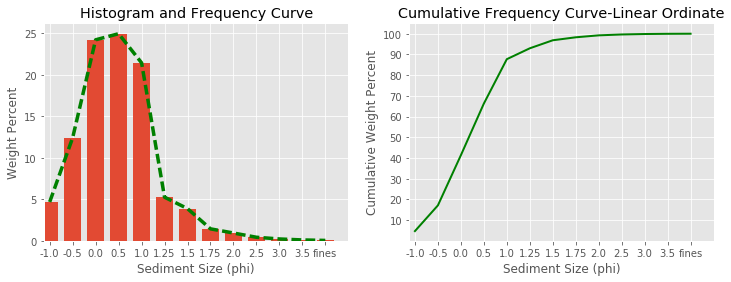

------------------------------------------------------------------------------------------



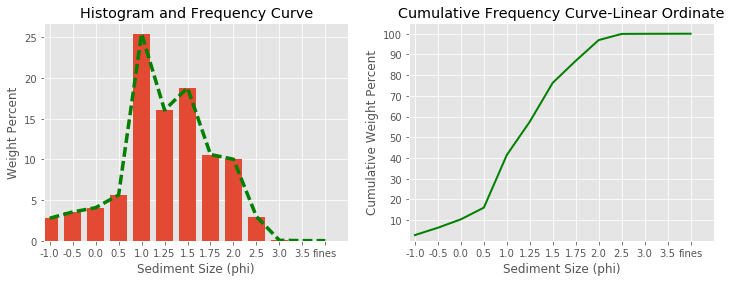

------------------------------------------------------------------------------------------



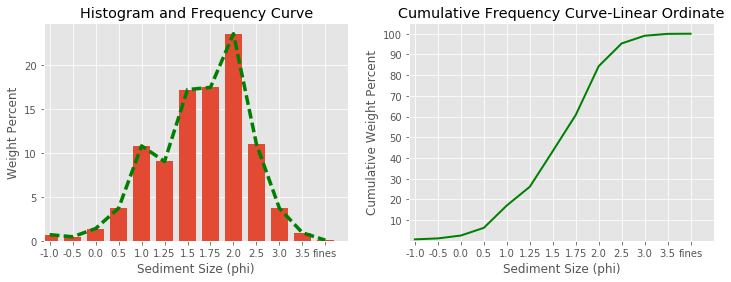

------------------------------------------------------------------------------------------


In [3]:
### EXAMPLE: Calling method PLOTDualSampleWtPercents (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    D=sc.InterpolateQuantileValues()
    
    for key, val in D.items():
        sc.PLOTDualSampleWtPercents(key)   # mode defaults to 'plot to console'

#### GetDataFrame <a name="get data frame"></a> 

returns the sample set data frame df to the caller.

Input args: none

Returns: pandas dataframe for the current sample data
           
[Back to Guide](#Guide)

In [9]:
### EXAMPLE: Calling method GetDataFrame (for a single transect)

# import prerequisites:
import sys
import pandas as pd

# adding the sys.path variable to point to the SedSASClass.py file:
sys.path.append('./')

# import SedSAS class:
import SedSASClass

# user inputs:
fp='./'
fn='USFWS_t2.txt'
delim=','
samples=['S1','S2','S3','S4']
scrns=[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0]

# read input file, create, populate, and wrangle data frame df:
df = pd.read_csv(fp+fn)
df=df.drop(['Pan Weight','Wet Sample Weight'], axis=1)

trList=['T2']   
for tr in trList:
    sc = SedSASClass.SedSAS(df, tr, samples, scrns)
    df = sc.GetDataFrame()
    print(df.head())


Processing transect: T2


            S1     S2     S3     S4     S1wp     S2wp     S3wp      S4wp  \
-1.0phi  37.89   3.19   1.47    0.7  44.8243  4.68154  2.76836  0.696795   
-0.5phi  23.31   8.46   1.88   0.46   27.576  12.4156  3.54049  0.457894   
0phi     12.74   16.5   2.16    1.4  15.0716  24.2149   4.0678   1.39359   
0.5phi     4.4     17   2.99   3.73  5.20525  24.9486  5.63089   3.71292   
1.0phi    2.25  14.61  13.51  10.85  2.66178  21.4412  25.4426   10.8003   

           S1cwp    S2cwp    S3cwp     S4cwp  phi  
-1.0phi  44.8243  4.68154  2.76836  0.696795 -1.0  
-0.5phi  72.4003  17.0972  6.30885   1.15469 -0.5  
0phi     87.4719   41.312  10.3766   2.54828  0.0  
0.5phi   92.6772  66.2606  16.0075    6.2612  0.5  
1.0phi   95.3389  87.7018  41.4501   17.0615  1.0  


#### Analyze2csv <a name="analyze2csv"></a> 

performs internal processing (without need for the user to call the individual methods explicitly/directly) to compile the raw data, weight percentages, cumulative weight percentages, graphic and method of moment statistics, and the mode(s). All of these are written directly to an output file (user specified path and file name) formatted as comma separated values. 

Input args: 
    fn = user-defined output file name

Returns: none
            
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method Analyze2csv

#### Analyze2stdout <a name="analyze2stdout"></a> 

performs internal processing (without need for the user to call the individual methods explicitly/directly) to compile the raw data, weight percentages, cumulative weight percentages, graphic and method-of-moment statistics, andthe mode(s)  All of the these are written directly, formatted to standard out.
		
Input args: none
		
Returns: none
        
[Back to Guide](#Guide)

In [ ]:
### EXAMPLE: Calling method Analyze2stdout

In [ ]:
### process, in turn, each sample along each transect listed in the trList (User Inputs cell)
import SedSASampleClass as ssc

for tr in trList:
    inputs=(tr, samples, scrns)
    s=ssc.SedSASample(df, tr, samples, scrns)
    s.Analyze2Stdout()
    D=s.InterpolateQuantileValues()
    
    for sample, Q in D.items():
        s.PLOTDualSampleWtPercents(sample)
    


#### 1.) Analyze2CSV - the simplest case     (./Sample Scripts/SedSASampleScript_2CSV.py): 

In [ ]:
import sys
# set the file path to locate the SedSAS class file:
sys.path.append('/Users/paulp/Dropbox/projects/SedSAS/')

import SedSASampleClass as sssc

# loop thru the list of transects in the trList and process the samples for each:
for tr in trList:

    inputs=(fp,fn,delim,use_cols,tr,samples,scrns)  # argument passed to SedSASample instance from user inputs.
    mySand=sssc.SedSASample(inputs)                 # create instance of SedSASample class
    mySand.Analyze2CSV(tr+'.csv')
    
print('Fin!')

#### No extrapolation...

![title](T2_S1_dual.png) 

#### 2.) Calling methods in your own scripts  (./Sample Scripts/SedSASampleScript.py):

In [ ]:
import sys, math
sys.path.append('/Users/paulp/Documents/projects/SedSAS/')

import SedSASampleClass as sssc

# loop thru the list of transects in the trList and process the samples for each:
for tr in trList:
    # construct argument tuple passed to SASample class instance from user inputs.
    inputs=(fp,fn,delim,use_cols,tr,samples,scrns)

    mySand=sssc.SedSASample(inputs)
    # if you're calling class methods directly (other than Analyze2CSV) you must 
    # call InterpolateQuantileValues() and return the ordered dictionary D:
    D=mySand.InterpolateQuantileValues()
    
    df=mySand.GetDataFrame()        # return a reference to data frame df
    
    # to loop thru the samples list for each transect
    for s, Q in D.items():
    	# handle situation if the current transect sample set is missing from sample file
    	if( math.isnan( df[s].sum()) == True):  
        	print('Skipping sample:',tr,s, 'because of missing data...')
    	else:
        	gStats=mySand.ComputeGraphicStats(s,Q)     # compute graphic statistics
        	mStats=mySand.ComputeMomentStats(s)        # compute Method Moment statistics
        	mySand.PrintGraphicStats(s,gStats)		   # write gStats to the console
        	mySand.PrintMomentStats(mStats)            # write mStats to the console
             
        	modes=mySand.FindSampleModes(s)            # find mode(s)
        	mySand.PrintSampleModes(modes)

        	# uncomment the next line to draw a histogram, PDF, and CDF plots
        	# mode=print prints plot to console window; mode=save saves plot to png file
        	#mySand.PLOTDualSampleWtPercents(s, mode='print') 
             
print('Fin!')

#### 3.) Using the Report Generator Library (./Sample Scripts/SedSASampleScript_Reporting.py)

In [ ]:
# Additional input values for the report generator methods:
pname='USFWS - Pea Island National Wildlife Refuge'   # project name
smplDate='2/3/2016'                                   # sampling date


# loop thru the list of transects in the trList and process the samples for each:
for tr in trList:
    # construct argument tuple passed to SASample class instance from user inputs.
    inputs=(fp,fn,delim,use_cols,tr,samples,scrns)
    
    # create an SedSASample class instance for the current transect
    mySand=sssc.SedSASample(inputs)
    
    # if you're calling class methods directly (other than Analyze2CSV) you must 
    # call InterpolateQuantileValues() and return the ordered dictionary D:
    D=mySand.InterpolateQuantileValues()
    
    df=mySand.GetDataFrame()        # return a reference to data frame df
    
     # to generate the PDF archive report for the current transect call the report constructor:
    c=ssrm.SASReportConstructor(pname,tr)
    
    # to loop thru the samples list for each transect
    for s, Q in D.items():
    	# handle situation if the current transect sample set is missing from sample file
    	if( math.isnan( df[s].sum()) == True):  
        	print('Skipping sample:',tr,s, 'because of missing data...')
    	else:
        	gStats=mySand.ComputeGraphicStats(s,Q)     # compute graphic statistics
        	mStats=mySand.ComputeMomentStats(s)        # compute Method Moment statistics
        	modes=mySand.FindSampleModes(s)            # find mode(s)
        	
        	# generate a report page for the curent sample s:
        	ssrm.SASReportPageDispatcher(c, pname, smplDate, tr, s, df, D, gStats, mStats)
        	
    # close out and save the report for the current transect tr:
    ssrm.SASReportDestructor(c)
    
print('Fin!')

## Part IV: Access

Github:  https://github.com/pjparis/SedSASample

## Part V: Where to from here...